In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import scipy
from time import time
from scipy.stats import t as stud

# ЗАДАНИЕ 1

<img src="1.png">

In [47]:
# tlfba2 обычная доза приема алкоголя (гр)
# tlfbh2 обычная доза употребления героина (мгр)
# cravin собственная оценка необходимой дозы героина
# sex пол: 1 – женский, 0 – мужской
data = pd.read_csv('var9.tsv', sep = '\t', decimal=',')
data.sort_values('tlfbh2').head(5)

,sex,age,curent_working,tlfba2,tlfbh2,cravin
241,0,25,0,10.1,0.60,1.0
268,0,21,0,12.6,5.80,3.0
170,0,22,0,8.2,11.10,3.5
42,0,31,1,5.7,17.33,1.4
100,1,25,0,0.9,22.20,5.0


<BarContainer object of 280 artists>

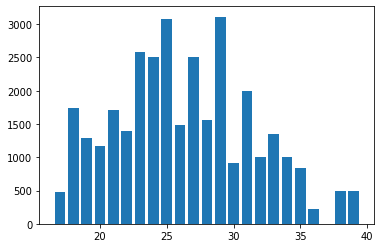

In [48]:
plt.bar(np.array(data['age']), np.array(data['tlfbh2']))

Можно немного проследить что сначала по возрасту возрастает, потом убывает, но не особо.

<BarContainer object of 280 artists>

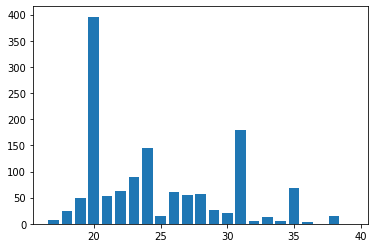

In [49]:
plt.bar(np.array(data['age']), np.array(data['tlfba2']))

То же самое, но дикий пик в 20 лет (как потом окажется, там просто выброс).

Выходит полная фигня. Копаем глубже

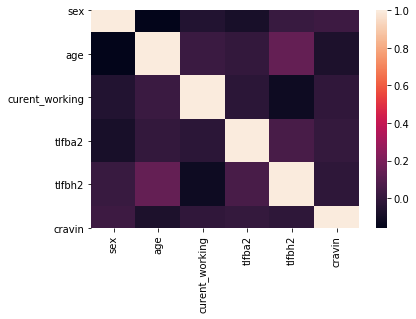

In [50]:
sns.heatmap(data.corr())

Корреляций особых, к сожалению нет (только отрецательные между работаешь/нет и героином), но давайте получше посмотрим на всякие зависимости:

### Мужчины/дэвушки

/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


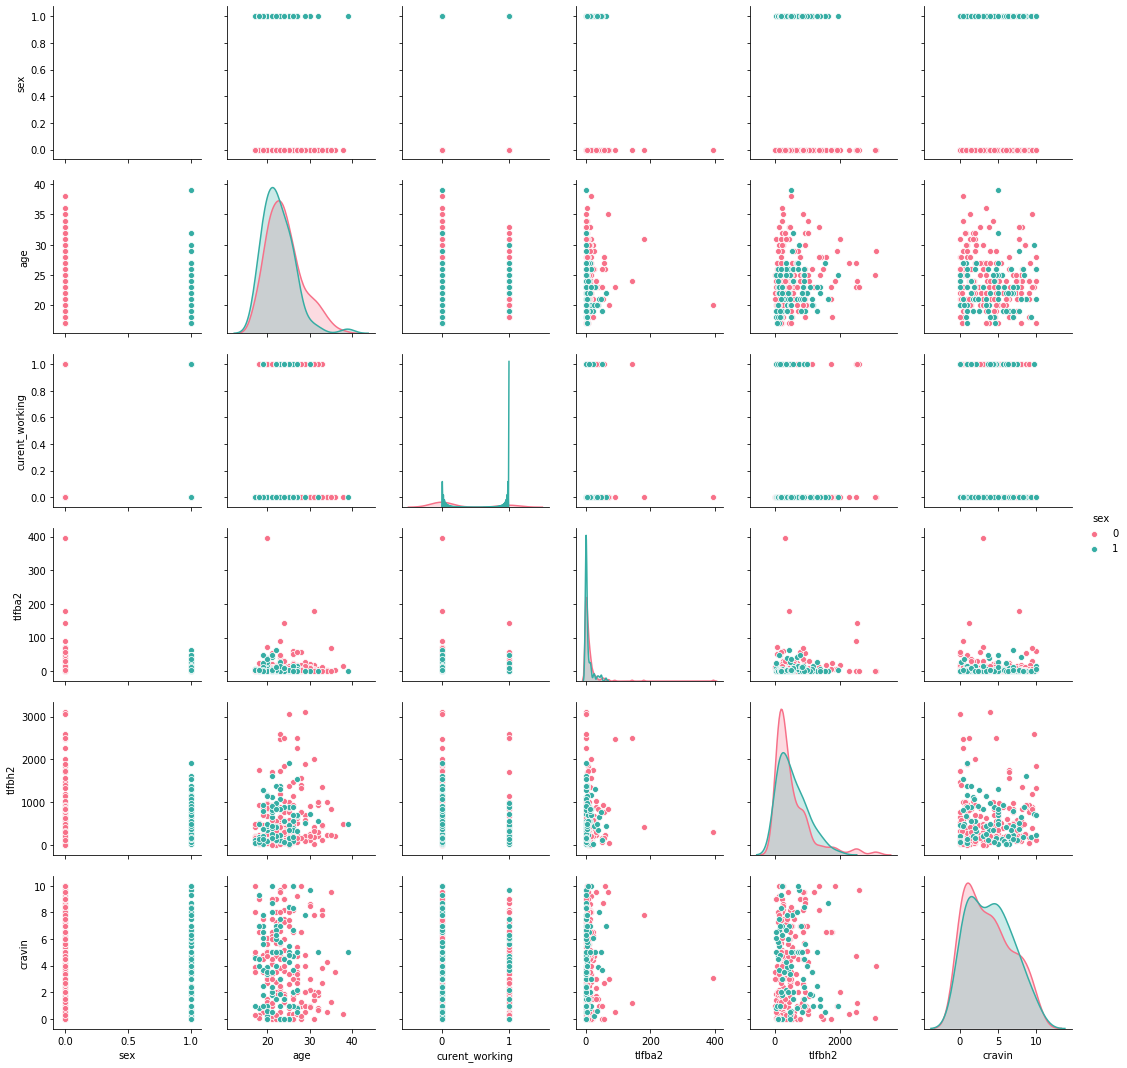

In [51]:
sns.pairplot(data, hue="sex", palette="husl");

Не густо. Почекаю описание, по полу разделю, будет лучше наверное.

In [53]:
data.groupby('sex').median()

,age,curent_working,tlfba2,tlfbh2,cravin
sex,,,,,
0,23,0,5.30,304.25,3.5
1,22,0,1.99,455.60,4.0


о, да, го посмотрим на боксплоты употребления алко и героина в зависимости от пола(хотя и так видно, что медиана намного больше у парней для алко и у девушек для героина)

P.S. (Это я просто примерно смотрел че да как, а сейчас буду конкретно исследовать)

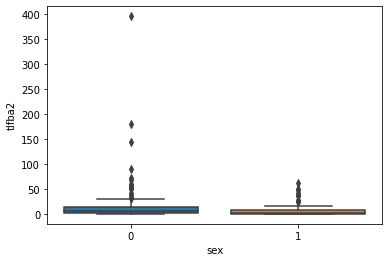

In [54]:
sns.boxplot(y=data.tlfba2, x=data.sex)

Алкоголик, который выжирает 400 грамм спирта, все портит. Он является выбросом и в прямом, и в переносном смысле.
Раздею на три датасета - на условные 3 группы: те, кто много пьет(3й квартиль там около 40, поэтому возьму >40), кто умеренно пьет(5-40 мл) и кто мало пьет (<5мл - но без нулей, это не интересно) и сравнивать внутри групп показатели.

alcoholics (>40 ml):


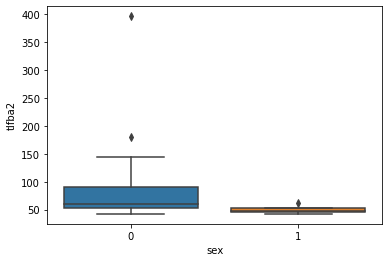

In [318]:
alco_holism = 40
alco_ok=5

data_non_zero = data[data.tlfba2 != 0]
data_alcoholism = data_non_zero[data_non_zero.tlfba2 > alco_holism]

data_less40 = data_non_zero[data_non_zero.tlfba2 <= alco_holism]
data_alco_ok = data_less40[data_less70.tlfba2 > alco_ok]

data_less5 = data_non_zero[data_non_zero.tlfba2 <= alco_ok]
print('alcoholics (>' + str(alco_holism)+' ml):')
sns.boxplot(y=data_alcoholism.tlfba2, x=data_alcoholism.sex)

normal guys (5-40 ml):


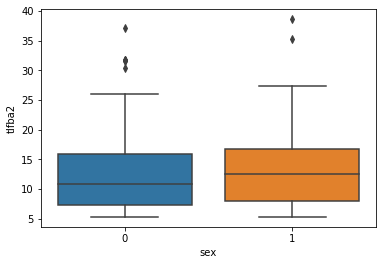

In [321]:
print('normal guys (' + str(alco_ok)+'-'+str(alco_holism)+' ml):')
sns.boxplot(y=data_alco_ok.tlfba2, x=data_alco_ok.sex)

almost sober guys (0,(0)1 -5 ml):


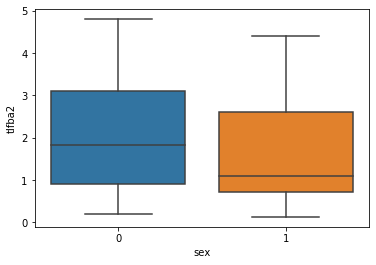

In [322]:
print('almost sober guys (0,(0)1 -'+str(alco_ok)+' ml):')
sns.boxplot(y=data_less5.tlfba2, x=data_less5.sex)

In [323]:
data_alco = data[data.tlfba2 > 0]
data_alco.groupby('sex').median()

,age,curent_working,tlfba2,tlfbh2,cravin
sex,,,,,
0,23,0,6.6,257.8,3.5
1,22,0,2.7,455.6,3.9


1) Сильнопьющих женщин мало (и пьют они меньше)

2) В категории среднепьющие побеждают женщины))

3) в категории малопьющие снова мужчины (вечерком расслабляются с баночкой пенного)

4) А в среднем мужчины пьют заметно больше, чем женщины. И квартиль больше, и медиана (среди всех медиана = 5.3 у мужчин и 1.99 у женщин, а среди пьющих 6.6 у мужчин и 2.7 у женщин (все в граммах спирта, видимо - маловато))))).


Проделаю тоже самое с героином.

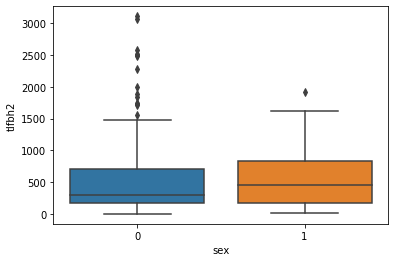

In [89]:
sns.boxplot(y=data.tlfbh2, x=data.sex)

Все хорошо, в среднем девушки больше употребляют наркотики.

Проверим, есть ли неупотребляющие:

In [79]:
data_hero = data[data.tlfbh2 == 0]
data_hero

,sex,age,curent_working,tlfba2,tlfbh2,cravin


Неа.

Построю отдельно для выбросов (пусть больше полуторатысяч - как раз граница 3го квартиля) и отдельно для меньше полуторатысяч: 

In [324]:
data_hero_max = data[data.tlfbh2 > 1500]
data_hero_ok = data[data.tlfbh2 <= 1500]

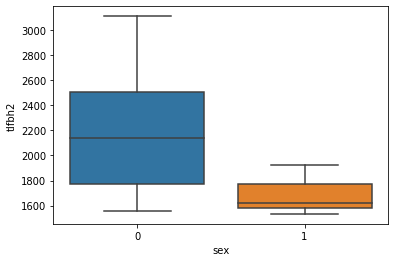

In [325]:
sns.boxplot(y=data_hero_max.tlfbh2, x=data.sex)

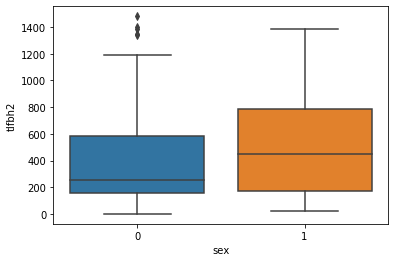

In [326]:
sns.boxplot(y=data_hero_ok.tlfbh2, x=data.sex)

Итак, среди всех употребляют в среднем: мужчины 304.25 мг героина, а девушки 455.60 мг.
Неупотребляющих в данном датасете не представлено.
Но, среди сильноупотребляющих больше парней.
Ну и на оценку необходимой дозы героина взглянем.

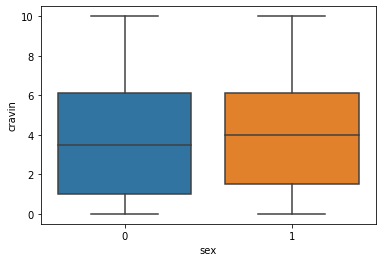

In [327]:
sns.boxplot(y=data.cravin, x=data.sex)

Не особо большая разница, у женщин чуть больше --- 4 против 3.5 (ну так как они употребляют чуть больше).

### Работают/нет

Ну и коротко пробежимся по работающим/не работающим людям

/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


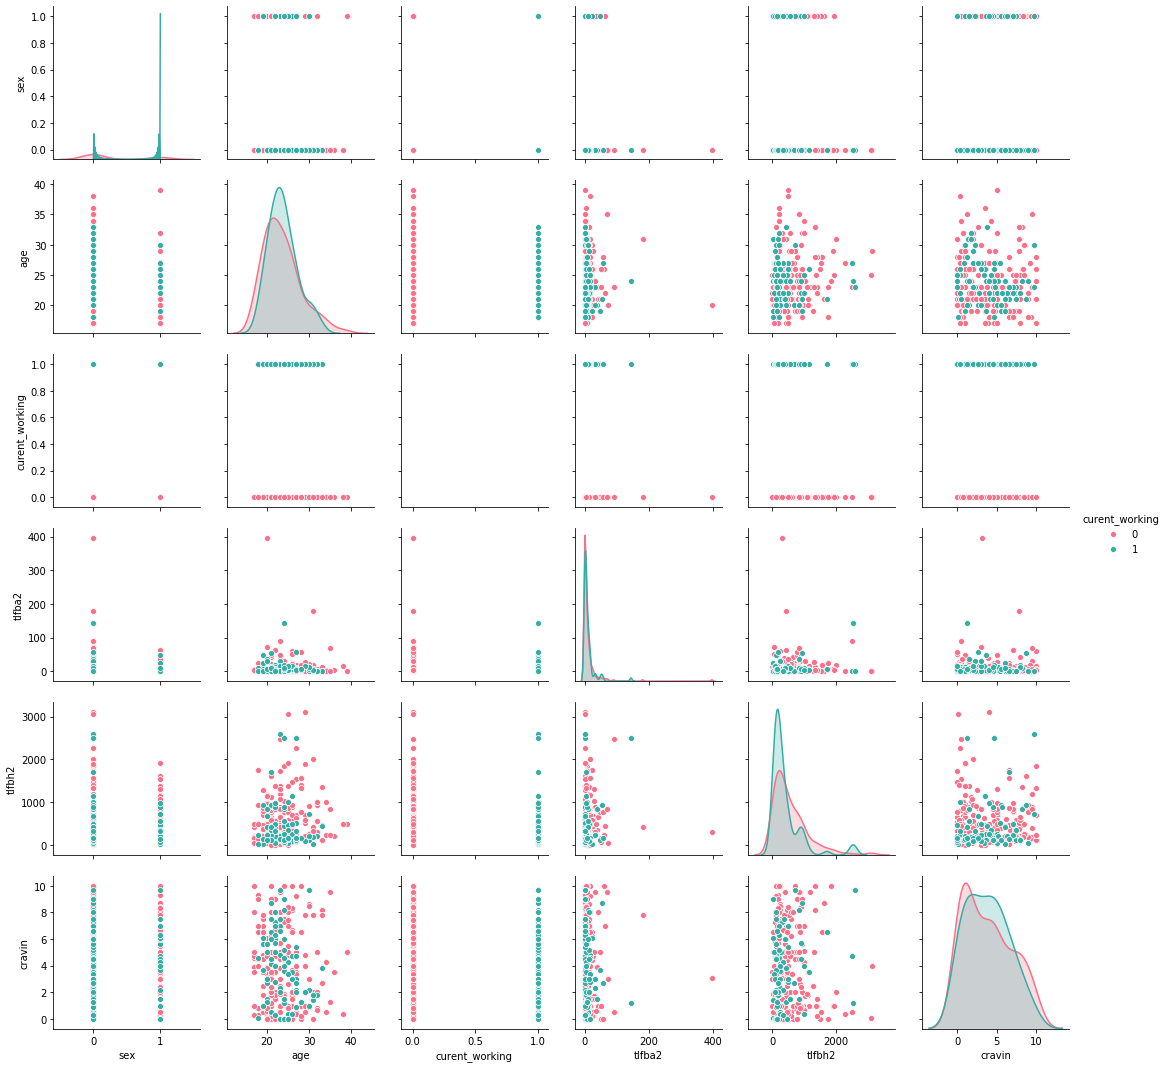

In [328]:
sns.pairplot(data, hue="curent_working", palette="husl");

In [329]:
data.groupby('curent_working').median()

,sex,age,tlfba2,tlfbh2,cravin
curent_working,,,,,
0,0.0,23.0,3.5,426.60,3.50
1,0.0,23.5,5.3,234.65,3.75


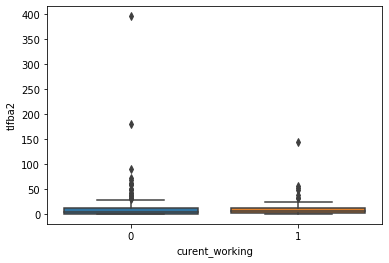

In [330]:
sns.boxplot(y=data.tlfba2, x=data.curent_working)

Лол, неработающие больше употребляют, но ЗАТО работающие больше пьют. Построим боксплоты точно так же, как делали выше:

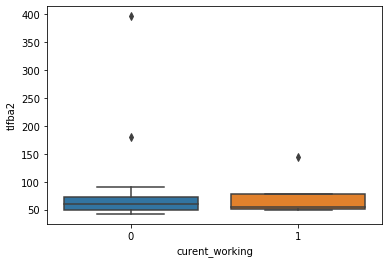

In [331]:
sns.boxplot(y=data_alcoholism.tlfba2, x=data_alcoholism.curent_working)

Все притянуты внизу, однако среди сильнопьющий в среднем разброс чуть больше в группе работающий (полоска оранжевая толще) и медиана у них выше.

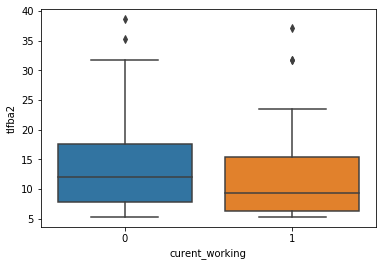

In [332]:
sns.boxplot(y=data_alco_ok.tlfba2, x=data_alco_ok.curent_working)

Из среднепьюющих пьют больше те, кто не работает.

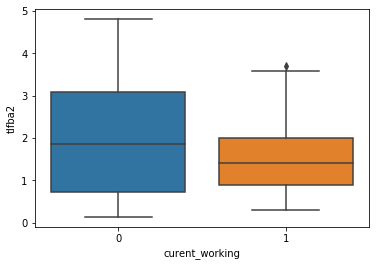

In [333]:
sns.boxplot(y=data_less5.tlfba2, x=data_less5.curent_working)

Тэперь все понятно, по группам медианы расположены примерно одинаково, однако, учитывая что если брать всех, то медиана почти на 2 мл будет больше у работающих, становится ясно, как работяги проводят свои вечера - баночка пива и спать.
Ну и героин.

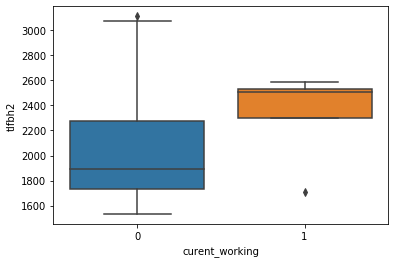

In [116]:
sns.boxplot(y=data_hero_max.tlfbh2, x=data.curent_working)

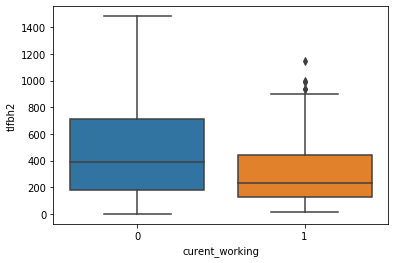

In [117]:
sns.boxplot(y=data_hero_ok.tlfbh2, x=data.curent_working)

ух! Работяги продолжают удивлять.

Хотя на дозах <1500 заметно лидируют безработные (более высокий уровень употребления), но есть несколько работяг, которые употребляют много (настолько, что медиана выше, чем у безраотных))

усе!

# Задание 2


<img src="2.png">

Все переменные понятны, theta -  наш параметр, генерируем 3 выборки размером 400б 10к и 100к; и рисуем плотность распределения (1, 3, 5) и функцию распределения(2, 4, 6).

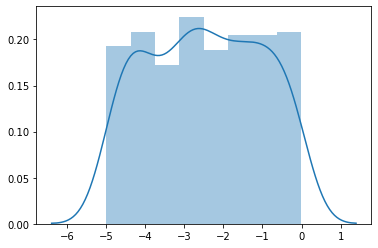

In [120]:
theta = 5
sample = np.random.uniform(low=-theta, high=0, size=400)
sns.distplot(sample)

(array([0.0375, 0.0675, 0.105 , 0.1325, 0.175 , 0.2125, 0.2425, 0.2575,
        0.2875, 0.315 , 0.35  , 0.37  , 0.425 , 0.4575, 0.4975, 0.535 ,
        0.5725, 0.595 , 0.6325, 0.66  , 0.6975, 0.725 , 0.765 , 0.8   ,
        0.8225, 0.87  , 0.895 , 0.925 , 0.95  , 1.    ]),
 array([-4.99150008, -4.82528345, -4.65906682, -4.49285019, -4.32663357,
        -4.16041694, -3.99420031, -3.82798368, -3.66176705, -3.49555043,
        -3.3293338 , -3.16311717, -2.99690054, -2.83068392, -2.66446729,
        -2.49825066, -2.33203403, -2.1658174 , -1.99960078, -1.83338415,
        -1.66716752, -1.50095089, -1.33473427, -1.16851764, -1.00230101,
        -0.83608438, -0.66986775, -0.50365113, -0.3374345 , -0.17121787,
        -0.00500124]),
 <a list of 30 Patch objects>)

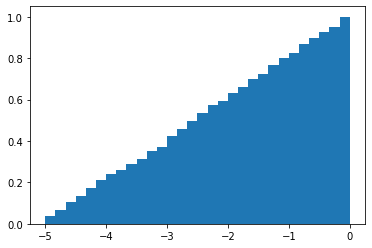

In [121]:
plt.hist(sample,cumulative=True, density=True, bins=30)

ну такооое, есть заскоки. Попробую то же самое на 10000 и 100000.

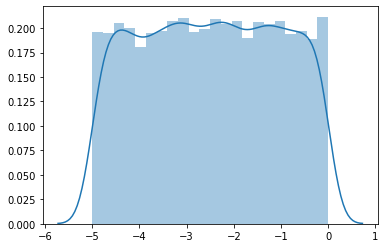

In [122]:
sample_2 = np.random.uniform(low=-theta, high=0, size=10000)
sns.distplot(sample_2)

(array([0.0336, 0.0648, 0.0984, 0.1327, 0.1659, 0.1974, 0.2266, 0.2601,
        0.2937, 0.327 , 0.3614, 0.3963, 0.4297, 0.4621, 0.4957, 0.5306,
        0.5668, 0.6004, 0.6329, 0.6654, 0.6977, 0.733 , 0.7672, 0.8   ,
        0.8326, 0.8666, 0.9001, 0.9312, 0.9638, 1.    ]),
 array([-4.99992453e+00, -4.83326934e+00, -4.66661414e+00, -4.49995895e+00,
        -4.33330375e+00, -4.16664855e+00, -3.99999336e+00, -3.83333816e+00,
        -3.66668297e+00, -3.50002777e+00, -3.33337258e+00, -3.16671738e+00,
        -3.00006219e+00, -2.83340699e+00, -2.66675180e+00, -2.50009660e+00,
        -2.33344141e+00, -2.16678621e+00, -2.00013102e+00, -1.83347582e+00,
        -1.66682062e+00, -1.50016543e+00, -1.33351023e+00, -1.16685504e+00,
        -1.00019984e+00, -8.33544648e-01, -6.66889452e-01, -5.00234257e-01,
        -3.33579062e-01, -1.66923866e-01, -2.68670870e-04]),
 <a list of 30 Patch objects>)

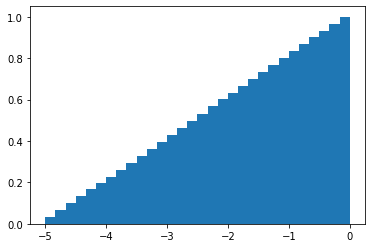

In [123]:
plt.hist(sample_2,cumulative=True, density=True, bins=30)

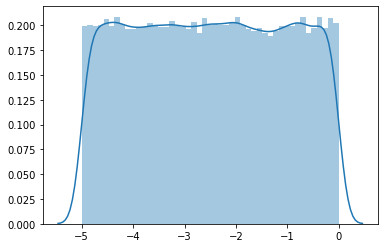

In [124]:
sample_3 = np.random.uniform(low=-theta, high=0, size=100000)
sns.distplot(sample_3)

(array([0.03365, 0.06667, 0.10049, 0.13472, 0.16814, 0.2011 , 0.23398,
        0.26688, 0.30077, 0.33392, 0.36778, 0.4008 , 0.43369, 0.46679,
        0.50038, 0.53449, 0.5671 , 0.60156, 0.63562, 0.66795, 0.701  ,
        0.73278, 0.76524, 0.79812, 0.83189, 0.8664 , 0.89889, 0.93247,
        0.96608, 1.     ]),
 array([-4.99997460e+00, -4.83331553e+00, -4.66665647e+00, -4.49999740e+00,
        -4.33333833e+00, -4.16667926e+00, -4.00002019e+00, -3.83336112e+00,
        -3.66670205e+00, -3.50004299e+00, -3.33338392e+00, -3.16672485e+00,
        -3.00006578e+00, -2.83340671e+00, -2.66674764e+00, -2.50008857e+00,
        -2.33342951e+00, -2.16677044e+00, -2.00011137e+00, -1.83345230e+00,
        -1.66679323e+00, -1.50013416e+00, -1.33347509e+00, -1.16681603e+00,
        -1.00015696e+00, -8.33497888e-01, -6.66838820e-01, -5.00179751e-01,
        -3.33520683e-01, -1.66861614e-01, -2.02545633e-04]),
 <a list of 30 Patch objects>)

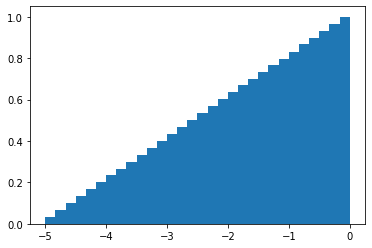

In [125]:
plt.hist(sample_3,cumulative=True, density=True, bins=30)

Defenetly, намного равномернее равномерное распределение)).

### 2a. Сходимости

Нужно продемонстрировать сходимость оценки параметра к истинному значению. Сделаем же это!
theta_hats - оценки этого параметра

In [310]:
def draw_convergence(x, y, title, theta):
    x = np.array(x)
    y = np.array(y)
    
    data = np.column_stack((x, y))

    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )
    plt.plot([0, max(x)],[theta,  theta], linestyle="-", color = 'lime')
#     ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.set_title(title)

    plt.show()

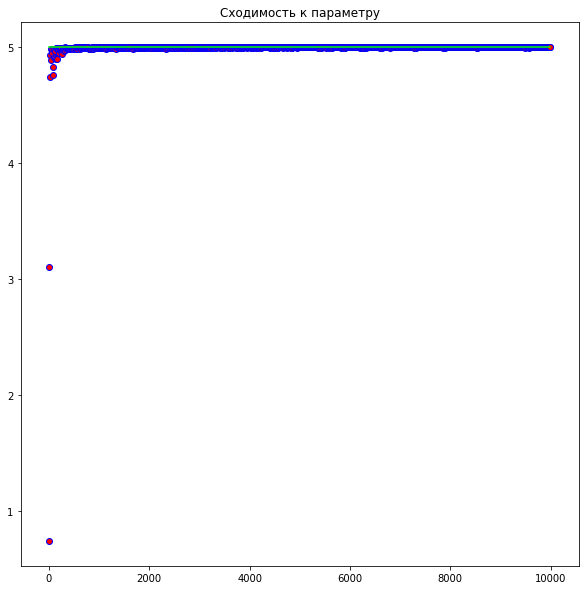

In [311]:
theta_hats = []
diff = []
# Точек будет max_n*5+1
max_n = 1000
theta_hats.append(min(np.random.uniform(low=-theta, high=0, size=1))*-1)
for i in range (1, max_n):
    theta_hats.append(min(np.random.uniform(low=-theta, high=0, size=i*10+1))*-1)
    diff.append(abs(theta_hats[i-1]-theta_hats[i-2]))
draw_convergence([i for i in range (1, max_n*10+1, 10)], theta_hats, 'Сходимость к параметру', theta)

Сходится (вроде даже оценка несмещенная), теперь посмотрим на скорость сходимости.
Для этого я кроме самих значений вычислял разницу между соседними элементами (массив diff). Он стремится к нулю, если сходится (сейчас мы это увидим), и скорость можно посмотреть асимптотически. Сделаем это!

In [312]:
def draw_speed(x, y, title, theta):
    x = np.array(x)
    y = np.array(y)
    
    data = np.column_stack((x, y))

    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )
#     plt.plot([0, max(x)],[theta,  theta], linestyle="-", color = 'lime')
#     ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.set_title(title)

    plt.show()

Красный - разница между соседними эементами функции, 

Синяя пунктирная линия - 1/sqrt(n)

Пунктирная линия цвета индиго (фиолетовенькая) - 1/n

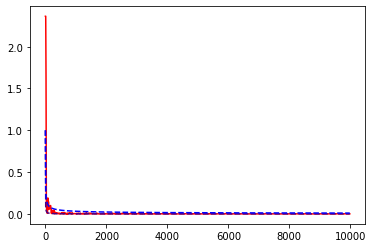

In [316]:
plt.plot([i for i in range (1, max_n*10-9, 10)], diff, linestyle="-", color = 'red')
plt.plot([i for i in range (1, max_n*10-9, 10)], [1/i for i in range (1, max_n*10-9, 10)], linestyle="--", color = 'indigo')
plt.plot([i for i in range (1, max_n*10-9, 10)], [1/sqrt(i) for i in range (1, max_n*10-9, 10)], linestyle="--", color = 'blue')

Изображу в логарифмической шкале, чтобы было лучше видно:

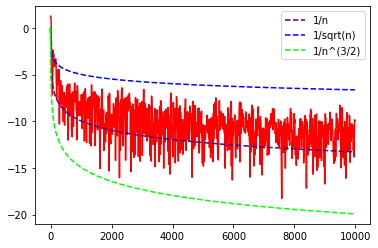

In [323]:
plt.plot([i for i in range (1, max_n*10-9, 10)], np.log2(np.array(diff)), linestyle="-", color = 'red')
plt.plot([i for i in range (1, max_n*10-9, 10)], [np.log2(1/i) for i in range (1, max_n*10-9, 10)], linestyle="--", color = 'indigo', label = '1/n')
plt.plot([i for i in range (1, max_n*10-9, 10)], [np.log2(1/sqrt(i)) for i in range (1, max_n*10-9, 10)], linestyle="--", color = 'blue', label = '1/sqrt(n)')
plt.plot([i for i in range (1, max_n*10-9, 10)], [np.log2(1/(i**(3/2))) for i in range (1, max_n*10-9, 10)], linestyle="--", color = 'lime', label = '1/n^(3/2)')
plt.legend()
plt.show()

##### Таким образом, ответ:

Видно, что асимптотически скорость сходимости пропорциональна $\frac{1}{n}$. 
Готово!

### 2b Рао-Крамер

Неравенство Рио-Крамера:

$ D (\overline{ \theta_n}) \geq  \frac{1}{I_n{\theta}} $

Построим график правой и левой частей в зависимости от n.

* Дисперсию можно посчитать.
* Считаем правую часть (используя ОМП и формулу для информации фишера из вики):

$I_n{\theta} = E(\frac{\partial}{\partial \theta} ln(f(x)))^2=E(\frac{\partial}{\partial \theta} ln(\frac{1}{\theta}))^2=E(\frac{\partial}{\partial \theta}(-ln(\theta)))^2=E(-\frac{1}{\theta})^2=\frac{n}{\theta^2}$

Тогда правая часть равна:
$\frac{1}{I_n{\theta}} = \frac{\theta^2}{n}$

In [298]:
def rao_cramer(theta = 0.1):
    lefts = []
    rights = []
    for i in range(100, 10003, 100):
        thetas = []
        for j in range(100):
            sample = np.random.uniform(low=-theta, high=0, size=i)
            thetas.append(min(sample)*(-1))
        std_dev = np.std(thetas, ddof=1)
        lefts.append(std_dev)
        rights.append((theta ** 2)/i)
    plt.plot([i for i in range(100, 10003, 100)], lefts, label = 'Left part', c = 'aquamarine')
    plt.plot([i for i in range(100, 10003, 100)], rights, label = 'Right part', c = 'orchid')
    plt.gca().set(xlabel='size of sample', ylabel='val of both parts')
    plt.legend()
    plt.show()

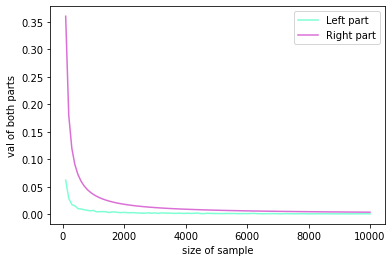

In [299]:
rao_cramer(6)

Норм, посмотрю на других параметрах theta.

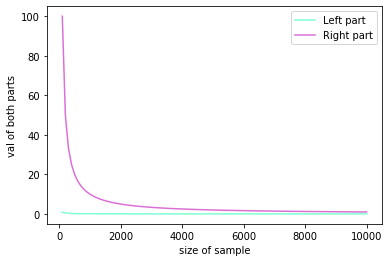

In [304]:
rao_cramer(100)

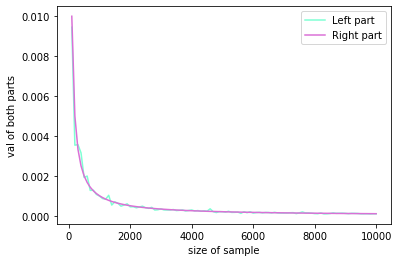

In [305]:
rao_cramer(1)

ВОУ. ИНТЕРЕСНО. при theta = 1. Они сравниваются. Посмотрим, что при тета<1:

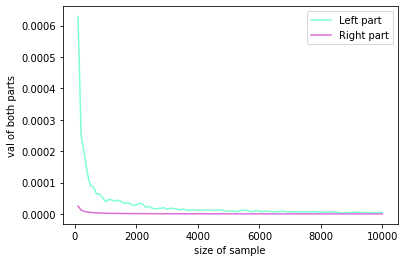

In [306]:
rao_cramer(0.05)

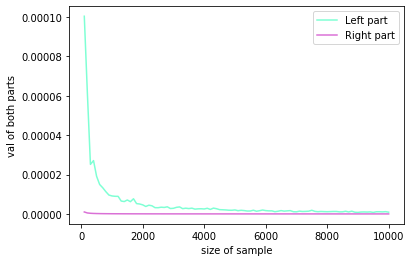

In [307]:
rao_cramer(0.01)

ВАУ, здорово!.
Видим, что бирюзовый график, соответствующий левой части неравенства меньше либо равен правой части при $\theta \geq 1$  и больше при $\theta<1$. Значит, неравенство Рао-Крамера выполняется при $\theta<1$.

Надеюсь, это ок.

# Задание 3

<img src="3.png">
Итак, нужно три вещи:

* Построить интервал (реаизовать функцию)
* Продемонстрировать, что он соответствует заявленной вероятности
* Продемонстрировать, почему при малых объемах такой доверительный интервал не имеет смысла.

#### Буду считать по формуле:

Напишем функцию, возвращающую интервал для мат. ожидания с неизвестной дисперсией, с вероятностью `alpha`.

$$(\overline{X} - t_2 \frac{S_0}{\sqrt{n}}; \overline{X} + t_2 \frac{S_0}{\sqrt{n}})$$

In [186]:
## stud это у меня от сюда from scipy.stats import t as stud
def interval(sample, alpha):
    sample_mean = sample.mean()
    sample_dev = np.std(sample, ddof=1)
    #degrees freedom
    df = len(sample) - 1
    t1, t2 = stud.interval(alpha, df)
    return sample_mean - t2 * sample_dev / sqrt(df + 1), sample_mean + t2 * sample_dev / sqrt(df + 1)

##### Проверим, сколько процентов элементов в массиве (состоящим из mean), попадает в интервал:
Буду создавать несколько (10000 штук) выборок для каждого заданного значения alpha - процента попаданий и смотреть реальный процент попаданий (с помощью функции `perc_in_interval`. В конце для нагядности построю график.

In [206]:
def perc_in_interval(x, intervals):
    amount = 0
    for interval in intervals:
        if x >= interval[0] and x <= interval[1]:
            amount += 1
    return amount / len(intervals)

Для нормального распределения с параметрами 0 и 1

Для вероятности alpha = 0.01
Процент попаданий = 0.0102

Для вероятности alpha = 0.03
Процент попаданий = 0.0284

Для вероятности alpha = 0.05
Процент попаданий = 0.0537

Для вероятности alpha = 0.07
Процент попаданий = 0.0717

Для вероятности alpha = 0.09
Процент попаданий = 0.0892

Для вероятности alpha = 0.11
Процент попаданий = 0.1078

Для вероятности alpha = 0.13
Процент попаданий = 0.1312

Для вероятности alpha = 0.15
Процент попаданий = 0.1491

Для вероятности alpha = 0.17
Процент попаданий = 0.1595

Для вероятности alpha = 0.19
Процент попаданий = 0.1897

Для вероятности alpha = 0.21
Процент попаданий = 0.2117

Для вероятности alpha = 0.23
Процент попаданий = 0.2263

Для вероятности alpha = 0.25
Процент попаданий = 0.2587

Для вероятности alpha = 0.27
Процент попаданий = 0.2711

Для вероятности alpha = 0.29
Процент попаданий = 0.296

Для вероятности alpha = 0.31
Процент попаданий = 0.3095

Для вероятности alpha = 0.33
Процент п

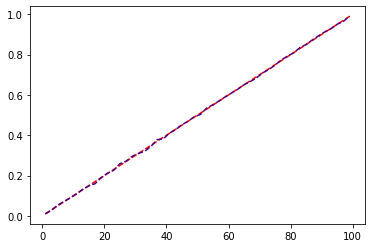

In [209]:
dream = []
true = []
m_1 = 0
dev = 1
print('Для нормального распределения с параметрами '+str(m_1)+' и '+str(dev)+'\n')
for alpha in range(1, 100, 2):
    alpha /= 100
    intervals = []
    for i in range(10000):
        sample = np.random.normal(loc = m_1, scale=dev, size = 1000)
        intervals.append(interval(sample, alpha))
    dream.append(alpha)
    pii = perc_in_interval(m_1, intervals)
    true.append(pii)
#     print('Для нормального распределения с параметрами '+str(m_1)+' и '+str(dev))
    print('Для вероятности alpha = ' + str(alpha))
    print('Процент попаданий = ' + str(pii))
    print()
print('На графике: красное - заданная вероятность, синее - реальный процент попаданий')
plt.plot([i for i in range (1, 100, 2)], dream, linestyle="--", color = 'red')
plt.plot([i for i in range (1, 100, 2)], true, linestyle="--", color = 'indigo')

Все красиво (красное и синее почти полностью совпадает), реальный процент попаданий близок к заданному причем может быть как больше так и меньше него. Показали!
##### Покажем, почему при малых объемах такой доверительный интервал не имеет смысла
Будем создавать выборки разных размеров и смотреть, какой у них доверительный интервал (большой/маленький) и попадает ли туда мат.ожидание.

In [256]:
def senseless(m_1 = 5, dev = 1, alpha = 0.8):
    x_1 = []
    x_2 = []
    m_real = []
    size_a = []
    print('Для нормального распределения с параметрами '+str(m_1)+' и '+str(dev))
    print('И для процента попадания alpha = '+str(alpha))
    for size in range(1, 1002, 5):
        size_a.append(size)
        intervals = []
        sample = np.random.normal(loc = m_1, scale=1, size = size)
        cur_interval = interval(sample, alpha)
        x_1.append(cur_interval[0])
        x_2.append(cur_interval[1])
        m_real.append(m_1)
    print('На графике: синее - верхняя граница, красное - нижняя граница, заленое - реальное значение m_1')
    plt.plot(size_a, x_1, linestyle="--", color = 'red')
    plt.plot(size_a, x_2, linestyle="--", color = 'indigo')
    plt.plot(size_a, m_real, linestyle="-", color = 'green')

In [254]:
def draw_speed(x_2, size_a):
    plt.plot(size_a, -1/x_2, linestyle="--", color = 'indigo')
    plt.plot(size_a, [sqrt(i) for i in range(1, 10002, 5)], linestyle="--", color = 'red')

И построим это для разных альф (процент попаданий):

Для нормального распределения с параметрами 0.1 и 1
И для процента попадания alpha = 0.8
На графике: синее - верхняя граница, красное - нижняя граница, заленое - реальное значение m_1


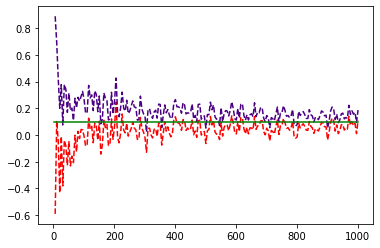

In [257]:
senseless(0.1)

Для нормального распределения с параметрами 0.3 и 1
И для процента попадания alpha = 0.8
На графике: синее - верхняя граница, красное - нижняя граница, заленое - реальное значение m_1


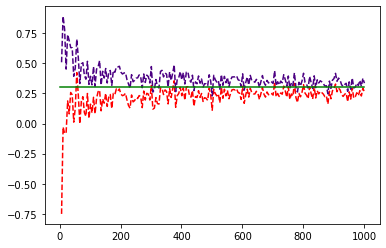

In [258]:
senseless(0.3)

Для нормального распределения с параметрами 0.6 и 1
И для процента попадания alpha = 0.8
На графике: синее - верхняя граница, красное - нижняя граница, заленое - реальное значение m_1


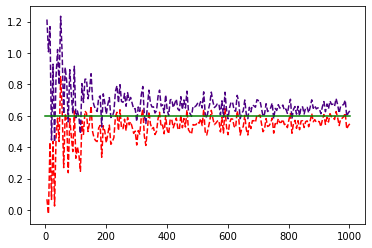

In [259]:
senseless(0.6)

Для нормального распределения с параметрами 0.9 и 1
И для процента попадания alpha = 0.8
На графике: синее - верхняя граница, красное - нижняя граница, заленое - реальное значение m_1


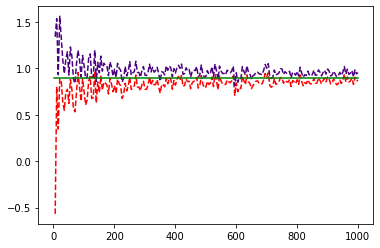

In [260]:
senseless(0.9)

Для нормального распределения с параметрами 0.99 и 1
И для процента попадания alpha = 0.8
На графике: синее - верхняя граница, красное - нижняя граница, заленое - реальное значение m_1


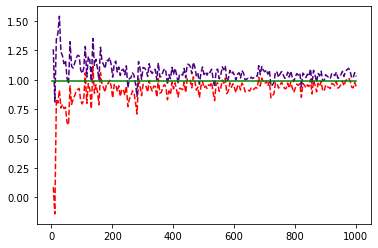

In [261]:
senseless(0.99)

Итак, вино, что 
* при увеличении n интервал уменьшается по ширине
* при мылах n бывают сильные "заскоки"
Таким образом, видно, что при малых n доверительный интервал бессмысленене, так как может быть очень неточен.

УРА.


# Задание 4
<img src="4.png">
Показать, что $D_n$ имеет предеельное распределение*

Первое, что сделаем - функцию для подсчета эмпирической функции распределения.

ЧТо хранят словари:

* amount[i] - количество элемента = i.
* amount_less[i] - количество элемента < i.

Считается все очевидно, просто сначала считаем количество каждого элемента (amount) , а потом пробегаемся еще раз, и смотрим количество меньших элементов, чем i-й => получаем числитель и чтобы получить саму функцию распределения, делим на знаменатель - получаем f:
* f - эмпирической функции распределения

p.s. в тот раз у меня функция распределения считалась неправильно, и поэтому были проблемы с возрастанием этой фигни.  Сейчас все исправил.

In [2]:
def f_n(sample):
    amount = {}
    sample.sort()
    for i in sample:
        if i in amount:
            amount[i] += 1
        else:
            amount.update({i:1})
    return from_density_to_distribution(amount, len(sample))

In [3]:
def from_density_to_distribution (amount, n):
    prev_key = ''
    cur_key = ''
    amount_less = {}
    for cur_key in amount:
        if prev_key != '':
            amount_less.update({cur_key:amount[prev_key]+amount_less[prev_key]})
        else:
            amount_less.update({cur_key:0})
        prev_key = cur_key
    amount_less.update({cur_key:n})
    f = {}
    for i in amount_less:
        f.update({i: amount_less[i]/n})
    return f

Напишем функции для вычисления значений Функции распределения в точке x для двух распределений: равномерного и нормального.

In [4]:
def f_uniform(x, a=0, b=1):
    if x < a: return 0
    if x >= b: return 1
    else: return (x-a)/(b-a)

def f_normal(x, mu = 0, sigma = 1):
    return scipy.stats.norm.cdf((x - mu)/sigma)

Ну и функция для подсчета этого критерия (Колмогорова-Смирнова) (на вход принимает сэмпл и тип сэмпла и параметры типа сэмпла)

1. Сначала бежит по всем значения эмпирической функцции распределения (посчитанной с помощью функции f_n)
2. Считает разницу между значением эмпирической функции распределения f_n_empirical[x] и теоретическим значением f_real (оно зависит от типа распределения, поэтому иф).
3. В супремум всегда будет записана максимальная разница к данному шагу.

Ну и возвращаем разницу, умноженную на $\sqrt{n}$ ($n$ - количество элементов в выборке).

In [7]:
def d_n(sample, dist_type = 'uniform', parameter_a = 0, parameter_b = 1):
    sup = -1
    f_n_empirical = f_n(sample)
    for x in f_n_empirical:
        f_real = 0
        if dist_type == 'uniform':
            f_real = f_uniform(x, parameter_a, parameter_b)
        if dist_type == 'normal':
            f_real = f_normal(x, parameter_a, parameter_b)
        difference = abs(f_real - f_n_empirical[x])
        if difference > sup:
            sup = difference
    return sup*(sqrt(len(sample)))

Тэперь посчитаем статистику критерия Колмогорова-Смирнова. Сначала для равномерного распределения (max_n - сколько итераций я сделаю, а максимаьный size выборки это max_n* на множитель в задании size, в данном случае множитель равен 100 и макс_колво = 100*1000 = 100000). (Так же буду считать скорость сходимости, для этого (как и во втором задании)).

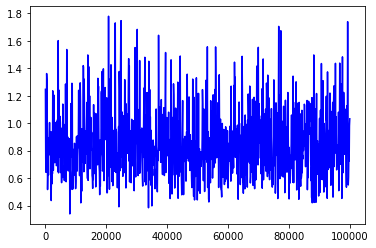

In [9]:
# a, b - параметры в равномерном распределении.
a = 0
b = 100
d_n_uniform = []
d_n_uniform_diff = []
max_n = 1000
d_n_uniform.append(d_n(np.random.uniform(low=a, high=b, size=100), 'uniform', a, b))
for i in range (2, max_n):
#     print(i*100, end = ' ')
    d_n_uniform.append(d_n(np.random.uniform(low=a, high=b, size=i*100), 'uniform', a, b))
    d_n_uniform_diff.append(abs(d_n_uniform[i-2]-d_n_uniform[i-1]))
plt.plot([i*100 for i in range (1, max_n)], d_n_uniform, linestyle="-", color = 'blue')

Странная фигня, оно как-будто скачит относительно одного числа (0.75). ИНТЭРЭСНО

Посмотрим на разницу между соседями.


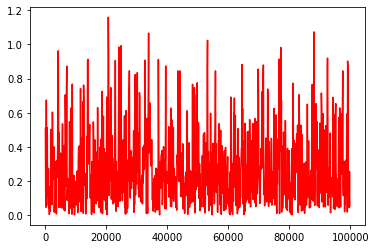

In [11]:
plt.plot([i*100 for i in range (1, max_n-1)], d_n_uniform_diff, linestyle="-", color = 'red')

Да, видно, что разница немного концентрируется около 0,2, но это все ненаучно.

##### Теперь посмотрим на нормальном  (тоже построим саму D_n и разницу между соседями).

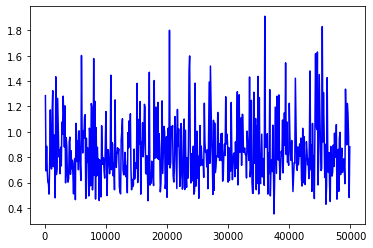

In [12]:
# mu, sigma - параметры в нормальном распределении.
mu = 2
sigma = 100
d_n_normal = []
d_n_normal_diff = []
max_n = 500
d_n_normal.append(d_n(np.random.normal(loc = mu, scale=sigma, size = 100), 'normal', mu, sigma))
for i in range (2, max_n):
#     print(i*100, end = ' ')
    d_n_normal.append(d_n(np.random.normal(loc = mu, scale=sigma, size=i*100), 'normal', mu, sigma))
    d_n_normal_diff.append(abs(d_n_normal[i-1]-d_n_normal[i-2]))
plt.plot([i*100 for i in range (1, max_n)], d_n_normal, linestyle="-", color = 'blue')

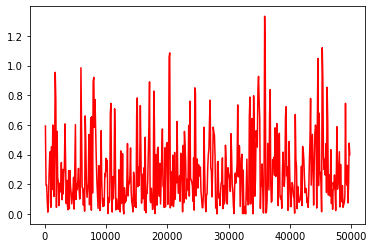

In [13]:
plt.plot([i*100 for i in range (1, max_n-1)], d_n_normal_diff, linestyle="-", color = 'red')

Тут тоже похоже: вертится вокруг 0.85. Что же делать?

#### ШАГ 2
Не понятно что происходит.
Совет:
```
У тебя в задании присутствует случайная величина D_n. А значит, у неё есть какое-то распределение. Так вот в задании мы просим показать, что это распределение к чему-то стремится. Штука в том, что если функция распределения последовательости, то с.в. сходится во всех точках к какой-то другой с.в., то распределения последовательности с.в. стремится к предельному.
Там же итак величина каждый раз уникальна
Ну тем не менее она случайная. Стоит промоделировать несколько выборок, и у нас уже несклько ее значений, так?

Короче говоря, я хочу, чтобы ты моделировал пачку выборок для одного n, строил функцию распределения для D_n и показал, что она с ростом n "стабилизируется".
```

Попробуем сделать, что написано

In [43]:
def draw_dict(d, col = 'blue', change = False):
    lists = sorted(d.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    if change:
        plt.plot(y, x, c = col)
    else:
        plt.plot(x, y, c = col)
    plt.show()

Будем для каждого size  = 1000, 2000, 3000, ..., 10000 моделировать по n = 100 экспериментов и смотреть что происходит с распределением $D_n$.

(Беру такие size, потому что выше видно, что при n почти с нуля поведение одинаковое, такчто не особо вижу смысла брать громадные).

Напишем функцию, которая:
* принимает `size` - размер выборки, `n` - количество выборок для одного size, `type_of_d` - тип выборки, `a`, `b` - параметры; 
* возвращает пачку d_n для одинаковых параметров.

In [56]:
def modeliruem(size = 1000, n = 100, type_of_d = 'normal', a = 0, b = 1):
    pack_of_d_n = []
    for i in range(n):
        distr = []
        if type_of_d == 'normal':
            distr = np.random.normal(loc = a, scale=b, size=size)
        else:
            distr = np.random.uniform(low = a, high = b, size = size)
        pack_of_d_n.append(d_n(distr, type_of_d, a, b))
    return np.array(pack_of_d_n)

И еще одну функцию, которая будет принимать все те же параметры, потом вызывать функцию моделлинга, получать результат и строить распределение с.в. d_n.

In [65]:
def check_d_n(size = 1000, n = 100, type_of_d = 'normal', a = 0, b = 1):
    tic = time()
    pack = modeliruem(size, n, type_of_d, a, b)
    
    lists = sorted(dens_n(pack).items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    
    toc = time() 
    print('Время выполнения: '+str(toc - tic)+' sec')
    print('Распределение D_n для '+type_of_d+' распределения с параметрами: '+str(a)+' и '+str(b)+' и размером size = '+str(size))
    print('Количество генераций D_n:'+str(n))
    print('Красное - функция распределения, синее - плотность')
    draw_dict(f_n(pack), col = 'red')
    sns.distplot(x); 

    

Проверим, что работает:

Время выполнения: 8.781123876571655 sec
Распределение D_n для normal распределения с параметрами: 0 и 1 и размером size = 1000
Количество генераций D_n:100
Красное - функция распределения, синее - плотность


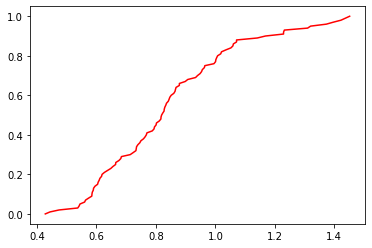

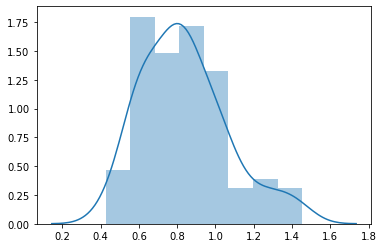

In [66]:
check_d_n()

Работает!

Запустим при разных size (1000, 5000, 10000, ...., 40000) с количеством итераций = 200 для каждого значения., параметры распределений буду брать как выше.

#### Итак, запустим для нормального с mu = 2 и sigma = 100

Время выполнения: 17.960158348083496 sec
Распределение D_n для normal распределения с параметрами: 2 и 100 и размером size = 1000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


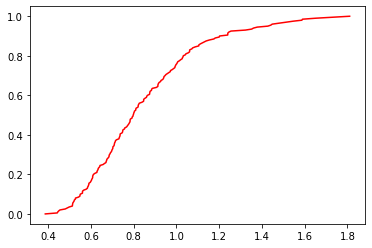

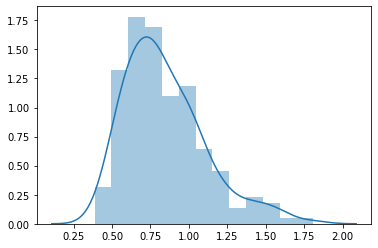

In [70]:
check_d_n(size = 1000, n = 200, a = 2, b = 100)

Время выполнения: 85.62278771400452 sec
Распределение D_n для normal распределения с параметрами: 2 и 100 и размером size = 5000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


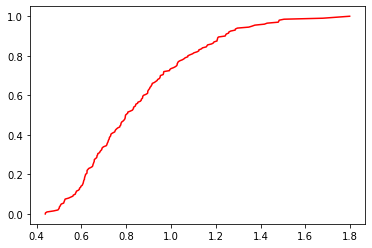

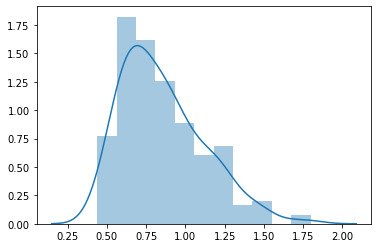

In [72]:
check_d_n(size = 5000, n = 200, a = 2, b = 100)

Время выполнения: 185.76505136489868 sec
Распределение D_n для normal распределения с параметрами: 2 и 100 и размером size = 10000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


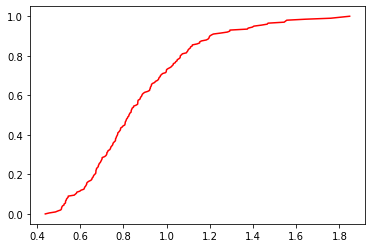

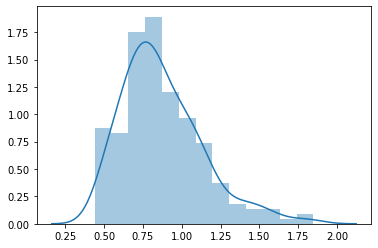

In [73]:
check_d_n(size = 10000, n = 200, a = 2, b = 100)

Время выполнения: 431.840234041214 sec
Распределение D_n для normal распределения с параметрами: 2 и 100 и размером size = 25000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


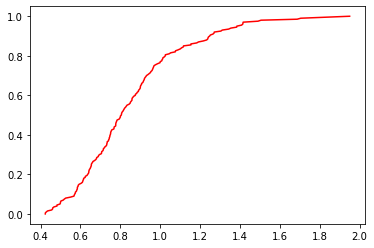

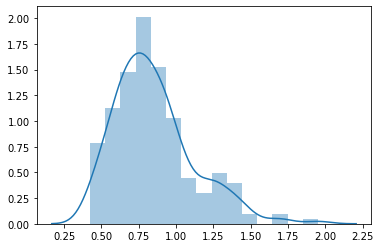

In [79]:
check_d_n(size = 25000, n = 200, a = 2, b = 100)

Время выполнения: 827.4034180641174 sec
Распределение D_n для normal распределения с параметрами: 2 и 100 и размером size = 35000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


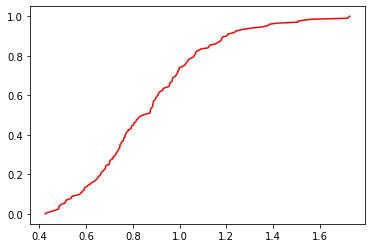

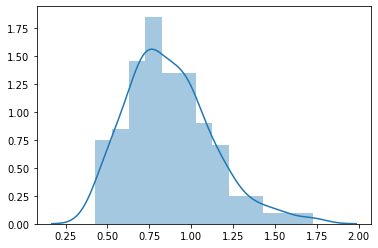

In [84]:
check_d_n(size = 35000, n = 200, a = 2, b = 100)

Да, действительно величина распределяется около одного значения (в данном случае ~ 0.75) и при этом с ростом n уменьщается разброс (еще интересен второй 'минипик' у отметки 1.3 - не знаю откуда он, но мне и не надо).

### Посмотрим еще для стандартного нормального распределения.

Время выполнения: 4.708438158035278 sec
Распределение D_n для normal распределения с параметрами: 0 и 1 и размером size = 100
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


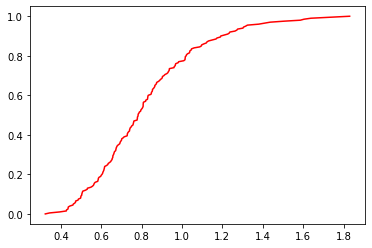

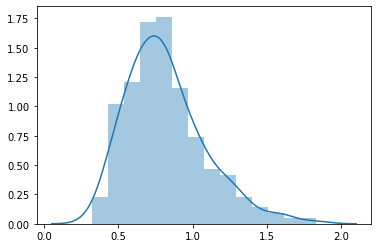

In [90]:
check_d_n(size = 100, n = 200, a = 0, b = 1)

Время выполнения: 24.01545023918152 sec
Распределение D_n для normal распределения с параметрами: 0 и 1 и размером size = 1000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


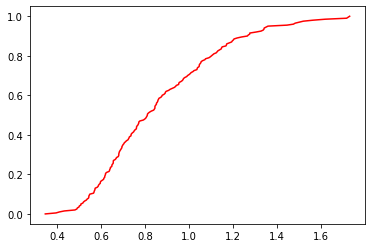

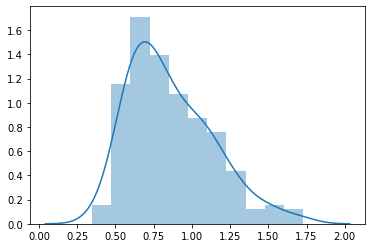

In [86]:
check_d_n(size = 1000, n = 200, a = 0, b = 1)

Время выполнения: 328.0763053894043 sec
Распределение D_n для normal распределения с параметрами: 0 и 1 и размером size = 10000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


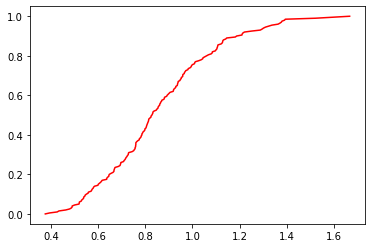

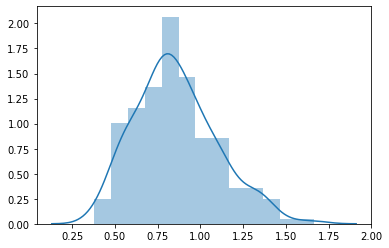

In [87]:
check_d_n(size = 10000, n = 200, a = 0, b = 1)

Время выполнения: 867.8409957885742 sec
Распределение D_n для normal распределения с параметрами: 0 и 1 и размером size = 30000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


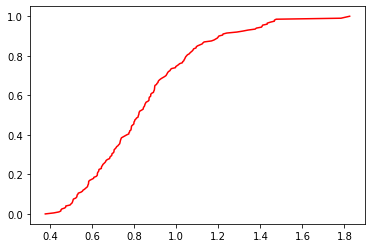

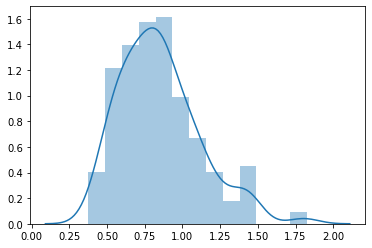

In [88]:
check_d_n(size = 30000, n = 200, a = 0, b = 1)

Тут все то же самое: при росте размера, функция распределения становится более наклонной, т.е. плотность в этом месте растет, т.е. с.в. стремится к определенному значению.
### Посмотрим, что будет для uniform(0,100)

Время выполнения: 1.6395540237426758 sec
Распределение D_n для uniform распределения с параметрами: 0 и 100 и размером size = 1000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


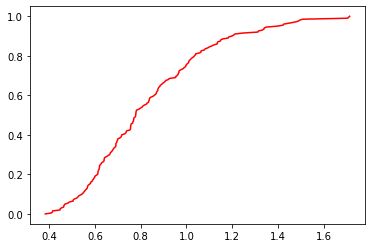

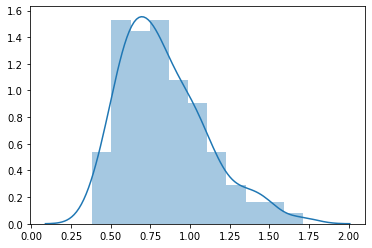

In [75]:
check_d_n(size = 1000, n = 200, a = 0, b = 100, type_of_d = 'uniform')

Время выполнения: 7.659696102142334 sec
Распределение D_n для uniform распределения с параметрами: 0 и 100 и размером size = 5000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


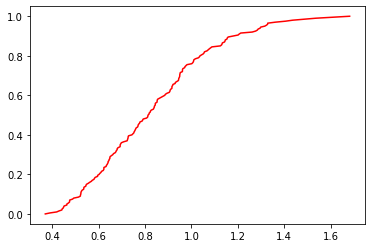

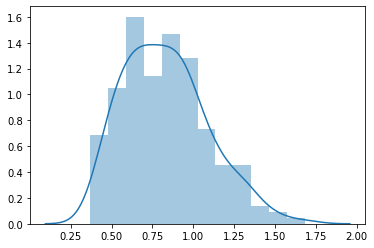

In [76]:
check_d_n(size = 5000, n = 200, a = 0, b = 100, type_of_d = 'uniform')

Время выполнения: 22.67417812347412 sec
Распределение D_n для uniform распределения с параметрами: 0 и 100 и размером size = 15000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


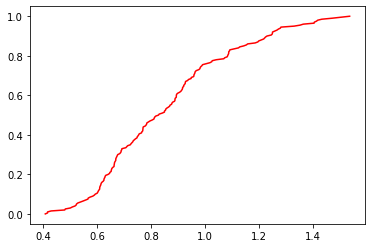

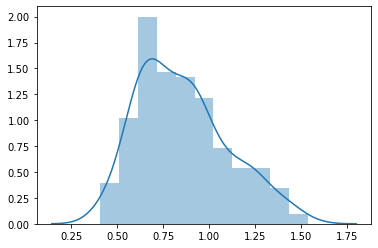

In [78]:
check_d_n(size = 15000, n = 200, a = 0, b = 100, type_of_d = 'uniform')

Время выполнения: 44.026451587677 sec
Распределение D_n для uniform распределения с параметрами: 0 и 100 и размером size = 20000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


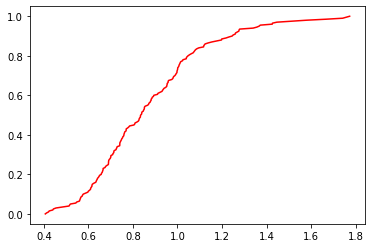

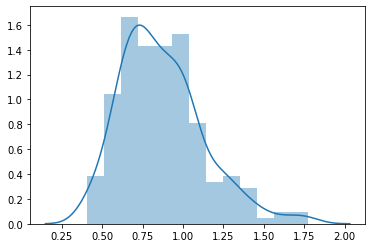

In [81]:
check_d_n(size = 20000, n = 200, a = 0, b = 100, type_of_d = 'uniform')

Время выполнения: 45.08494162559509 sec
Распределение D_n для uniform распределения с параметрами: 0 и 100 и размером size = 25000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


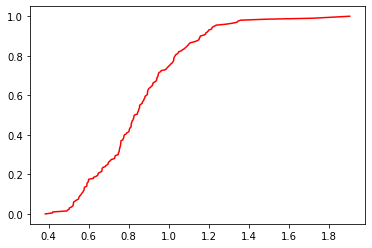

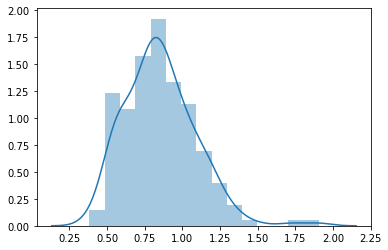

In [80]:
check_d_n(size = 25000, n = 200, a = 0, b = 100, type_of_d = 'uniform')

Время выполнения: 104.15757966041565 sec
Распределение D_n для uniform распределения с параметрами: 0 и 100 и размером size = 50000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


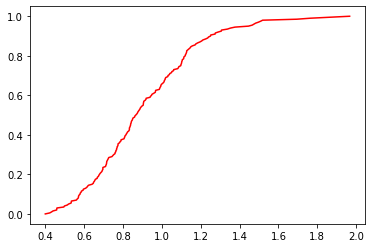

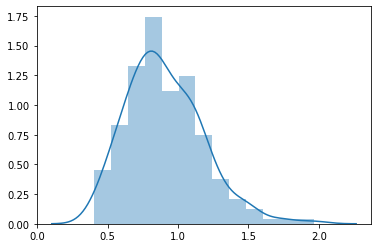

In [82]:
check_d_n(size = 50000, n = 200, a = 0, b = 100, type_of_d = 'uniform')

Время выполнения: 139.05638670921326 sec
Распределение D_n для uniform распределения с параметрами: 0 и 100 и размером size = 70000
Количество генераций D_n:200
Красное - функция распределения, синее - плотность


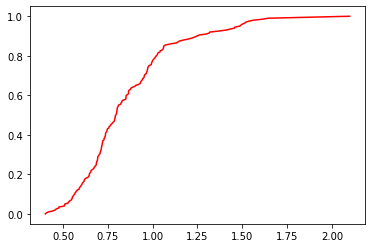

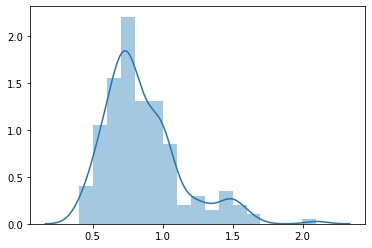

In [83]:
check_d_n(size = 70000, n = 200, a = 0, b = 100, type_of_d = 'uniform')

Тут все так же как и у нормального: величина распределяется около одного значения (в данном случае ~ 0.8) и при этом с ростом n уменьшается разброс (тоже присутствует второй 'минипик' у отметки 1.5 - но он особо не влияет).

### ТАКИМ ОБРАЗОМ. 
Действительно, с ростом размера выборки, величина $D_n$ стабилизируется: на графике функции распределения видно, что у нее увеличивается скорость роста в определенном месте, а функция плотности становится "уже" и "выше". Т.е. предельное распределение присутствует. УРЫ!

# THE END